In [45]:
import sys
print(sys.executable)


/home/codespace/.python/current/bin/python


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch


# Read data

## Indicators

In [47]:
# Dateien einlesen
df_trade = pd.read_excel("../data/un_comtrade/trade_data_all_hs.xlsx", sheet_name="Sheet1")

df_trade.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20200101,2020,52,2020,8,ALB,Albania,X,...,0.0,False,0,False,0.0,4.134163e+07,4.134163e+07,0,False,True
1,C,A,20200101,2020,52,2020,20,AND,Andorra,X,...,0.0,True,0,False,NaN,1.023307e+07,1.023307e+07,4,False,True
2,C,A,20200101,2020,52,2020,24,AGO,Angola,X,...,0.0,True,0,False,NaN,8.295085e+07,8.295085e+07,4,False,True
3,C,A,20200101,2020,52,2020,28,ATG,Antigua and Barbuda,X,...,0.0,True,0,False,NaN,4.687548e+05,4.687548e+05,4,False,True
4,C,A,20200101,2020,52,2020,31,AZE,Azerbaijan,X,...,0.0,True,0,False,0.0,4.975249e+07,4.975249e+07,4,False,True


In [48]:
df_trade.columns

Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate'],
      dtype='object')

## Metadata

# Data Analysis

In [49]:
# Optional: bessere Formatierung in Jupyter
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [50]:
desired_columns = [
    'refYear',
    'reporterISO',
    'reporterDesc',
    'primaryValue',
]

# Nur die ersten 4 Spalten und die gewünschten behalten
df_filtered = df_trade[desired_columns]
df = df_filtered

## Initial Data Analysis (IDA)

### Checking Form & Struktur

In [51]:
df.shape

(2802, 4)

### Checking Datentypen

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   refYear       2802 non-null   int64  
 1   reporterISO   2802 non-null   object 
 2   reporterDesc  2802 non-null   object 
 3   primaryValue  2802 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 87.7+ KB


### Checking first & last rows

In [53]:
df.head()

,refYear,reporterISO,reporterDesc,primaryValue
0,2020,ALB,Albania,4.134163e+07
1,2020,AND,Andorra,1.023307e+07
2,2020,AGO,Angola,8.295085e+07
3,2020,ATG,Antigua and Barbuda,4.687548e+05
4,2020,AZE,Azerbaijan,4.975249e+07


In [54]:
df.tail()

,refYear,reporterISO,reporterDesc,primaryValue
2797,2024,MKD,North Macedonia,2.832493e+05
2798,2024,EGY,Egypt,5.763368e+07
2799,2024,GBR,United Kingdom,1.710373e+09
2800,2024,USA,USA,2.572851e+09
2801,2024,UZB,Uzbekistan,1.194330e+05


### Checking Missing Values

In [55]:
# Übersicht zu fehlenden Werten
df.isnull().sum().sort_values(ascending=False)

refYear         0
reporterISO     0
reporterDesc    0
primaryValue    0
dtype: int64

### Checking unique values

In [56]:
# Anzahl eindeutiger Werte pro Spalte
df.nunique().sort_values()

refYear            5
reporterISO      169
reporterDesc     169
primaryValue    2802
dtype: int64

### Basic statistics

In [57]:
# Grundstatistik
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
refYear,2802.0,NaN,NaN,NaN,2021.76838,1.325158,2020.0,2021.0,2022.0,2023.0,2024.0
reporterISO,2802,169,ALB,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reporterDesc,2802,169,Albania,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryValue,2802.0,NaN,NaN,NaN,7492734119.458043,32003587693.569744,27.057,3892841.829,55462559.404,1077102478.068,551950811471.0


## Delete Import 

In [59]:
#df = df[df['flowDesc'] != 'Import']
# df.describe(include='all').T

### Detect outlieres

Z-Score

In [60]:
col = "primaryValue"
name = "reporterISO"

missing_countries = df[df[col].isna()][name].unique()

# Fehlende Länder ausgeben
print(col + " für folgende Länder nicht verfügbar:")

if(missing_countries.size != 0):
    for country in missing_countries:
        print("-", country)
else: 
    print("Keine Länder mit fehlenden Werten gefunden.")

# NaN-Werte entfernen
df_complete = df.dropna(subset=[col])

# Z-Score berechnen
df_complete['Z_Score'] = zscore(df_complete[col])

# Ausreißer mit |Z| > 1.5
outliers = np.abs(df_complete['Z_Score']) > 1.5
df_outliers = df_complete.loc[outliers, [name, col, 'Z_Score']]

# Ergebnis anzeigen
df_outliers


primaryValue für folgende Länder nicht verfügbar:
Keine Länder mit fehlenden Werten gefunden.


,reporterISO,primaryValue,Z_Score
106,CHN,4.400209e+11,13.517403
126,CHN,7.622394e+10,2.147993
221,DEU,2.375572e+11,7.189991
228,HKG,7.475768e+10,2.102169
229,DEU,2.113104e+11,6.369724
...,...,...,...
2744,ESP,5.996255e+10,1.639791
2775,GBR,8.549834e+10,2.437837
2776,USA,2.524268e+11,7.654698
2784,USA,1.437656e+11,4.258808


Visually: histograms

In [61]:

# Kategorische Daten als "category" casten
categorical_columns = ['reporterISO','reporterDesc']
for col in categorical_columns:
    df[col] = df[col].astype('category')

/tmp/ipykernel_5084/2614549071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/tmp/ipykernel_5084/2614549071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


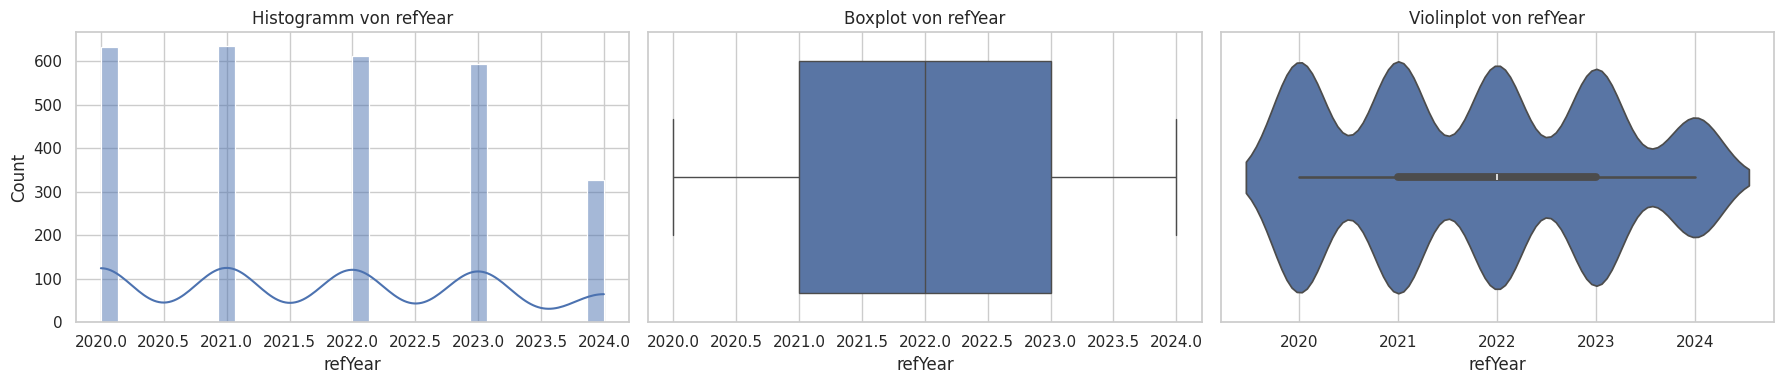

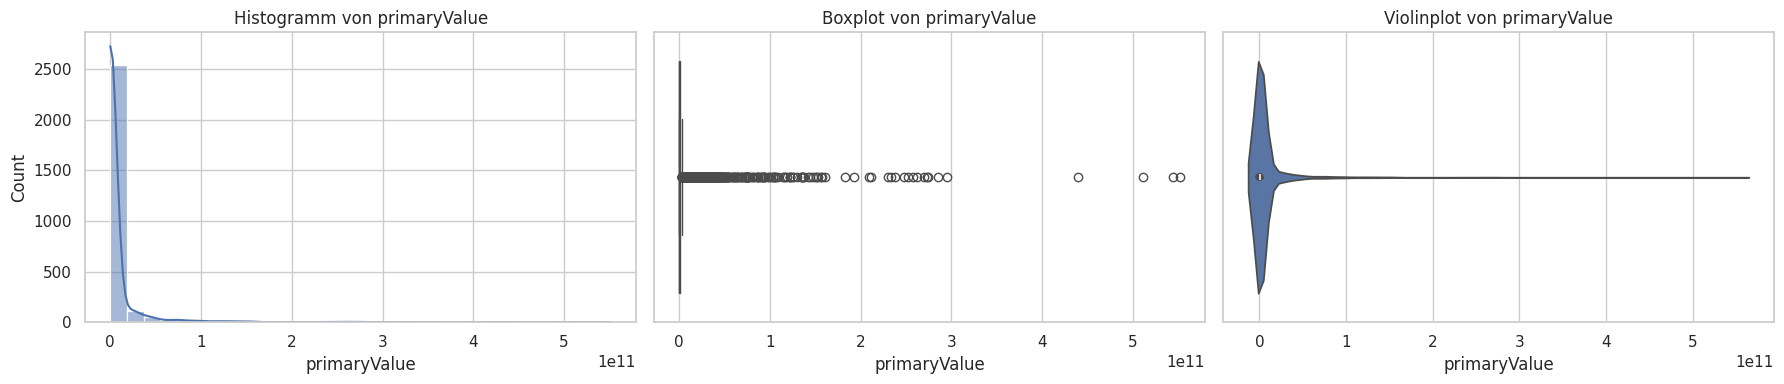

In [62]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    col_data = df[col].dropna()

    # Wenn Spalte nur NaNs enthält, überspringen
    if col_data.empty:
        print(f"Überspringe {col}: keine gültigen Werte.")
        continue

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogramm
    sns.histplot(col_data, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Histogramm von {col}')

    # Boxplot
    sns.boxplot(x=col_data, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col}')

    # Violinplot
    sns.violinplot(x=col_data, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col}')

    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis (EDA)

### Correlation Matrix

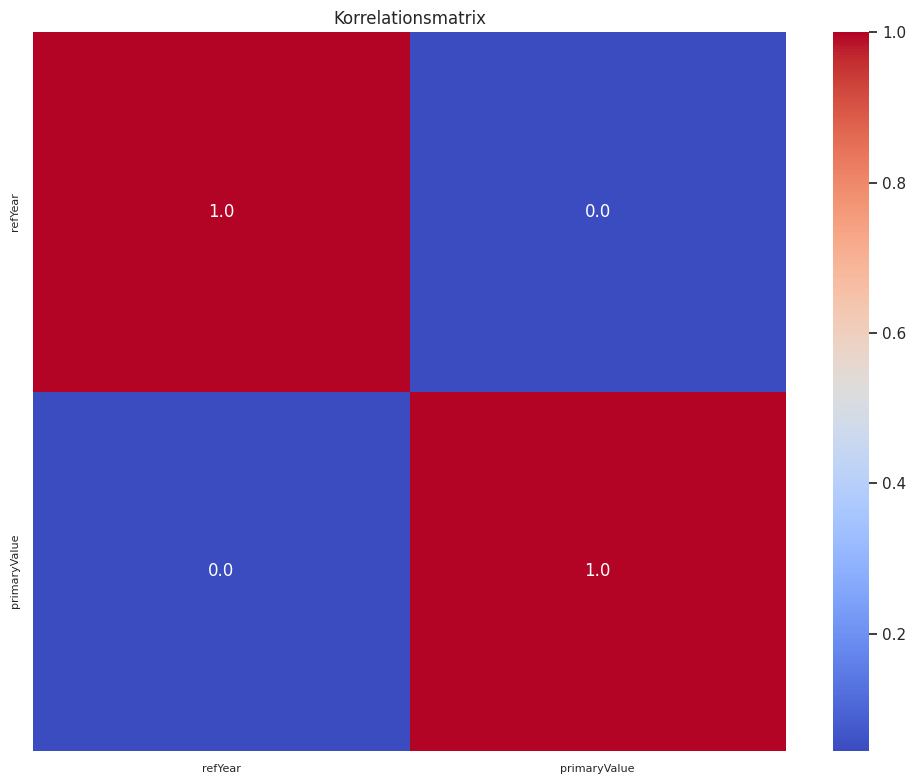

In [64]:

#df_filtered = df.drop(columns=["cifvalue"])

# Numerische Spalten auswählen, aber 'index' und 'Year' ausschließen
exclude_cols = ['index', 'Year']
num_cols = [col for col in df_filtered.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

# Korrelationsmatrix plotten
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Korrelationsmatrix')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.savefig('korrelationsmatrix.png', dpi=600)
plt.show()


### Pairplot

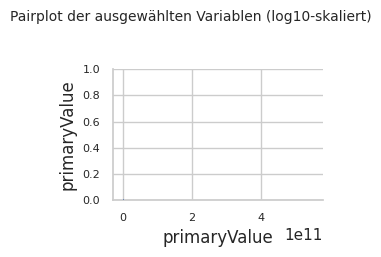

In [ ]:
# macht kein sinn, weil nur ein wert 
# Drei ausgewählte Variablen
selected_cols = [
    'primaryValue'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'primaryValue: primaryValue'
}

# Log-Skalierung anwenden (außer 'Literacy rate')
df_log = df[selected_cols].dropna().copy()
df_log[selected_cols[1:]] = df_log[selected_cols[1:]].apply(lambda x: np.log10(x + 1))

# Pairplot mit kleineren Punkten
g = sns.pairplot(
    df_log,
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Titel und Layout
plt.suptitle('Pairplot der ausgewählten Variablen (log10-skaliert)', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5084/3833179849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primaryValue'] = pd.to_numeric(df['primaryValue'], errors='coerce')
/tmp/ipykernel_5084/3833179849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primaryValue_log10'] = np.log10(df['primaryValue'] + 1)
/tmp/ipykernel_5084/3833179849.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

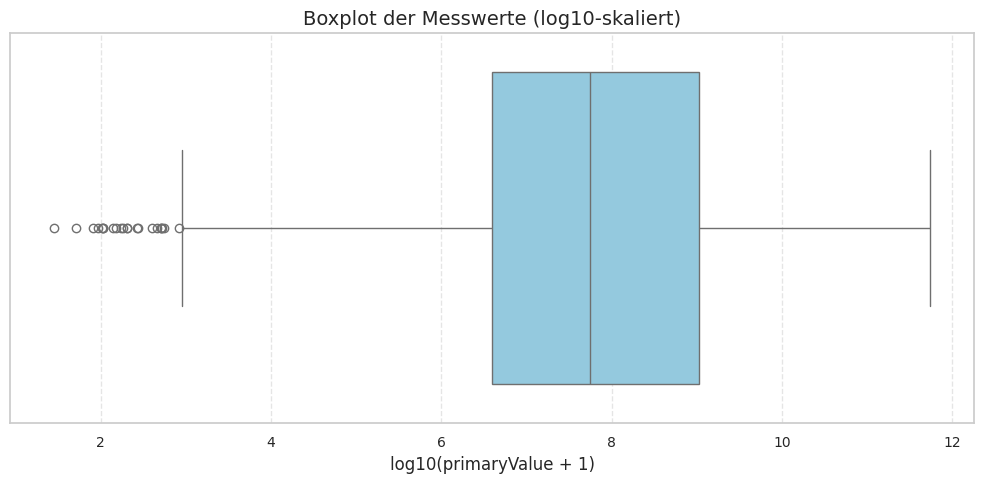

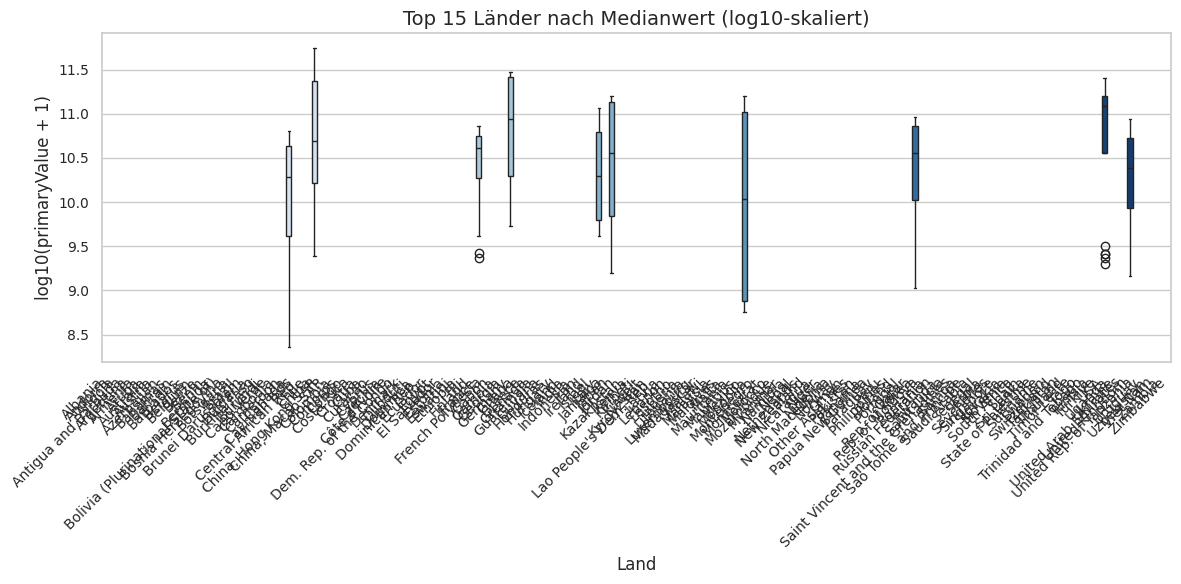

In [82]:
# Sicherstellen, dass 'primaryValue' numerisch ist
df['primaryValue'] = pd.to_numeric(df['primaryValue'], errors='coerce')

# Log10-Skalierung anwenden (+1 für stabile Berechnung bei Nullen)
df['primaryValue_log10'] = np.log10(df['primaryValue'] + 1)

# Boxplot zeichnen
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['primaryValue_log10'], color='skyblue')

# Titel & Achsentitel
plt.title("Boxplot der Messwerte (log10-skaliert)", fontsize=14)
plt.xlabel("log10(primaryValue + 1)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([])  # y-Achse ist nicht relevant bei Boxplots entlang der X-Achse

# Gitter & Layout
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()


# Matplotlib/Seaborn-Style
sns.set(style="whitegrid")

# Sicherstellen, dass primaryValue numerisch ist
df['primaryValue'] = pd.to_numeric(df['primaryValue'], errors='coerce')

# Log-Skalierung anwenden (+1 für Werte nahe 0)
df['primaryValue_log10'] = np.log10(df['primaryValue'] + 1)

# ▶️ Top 15 Länder nach Medianwert auswählen
top_countries = df.groupby('reporterDesc')['primaryValue'].median().nlargest(10).index
df_top = df[df['reporterDesc'].isin(top_countries)]

# ▶️ Boxplot zeichnen
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='reporterDesc',
    y='primaryValue_log10',
    palette='Blues'
)

# ▶️ Plot-Details
plt.title("Top 15 Länder nach Medianwert (log10-skaliert)", fontsize=14)
plt.xlabel("Land", fontsize=12)
plt.ylabel("log10(primaryValue + 1)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Paretoplot

/tmp/ipykernel_5084/2309976298.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pop = df_pop.groupby('reporterDesc', as_index=False)['primaryValue'].sum()


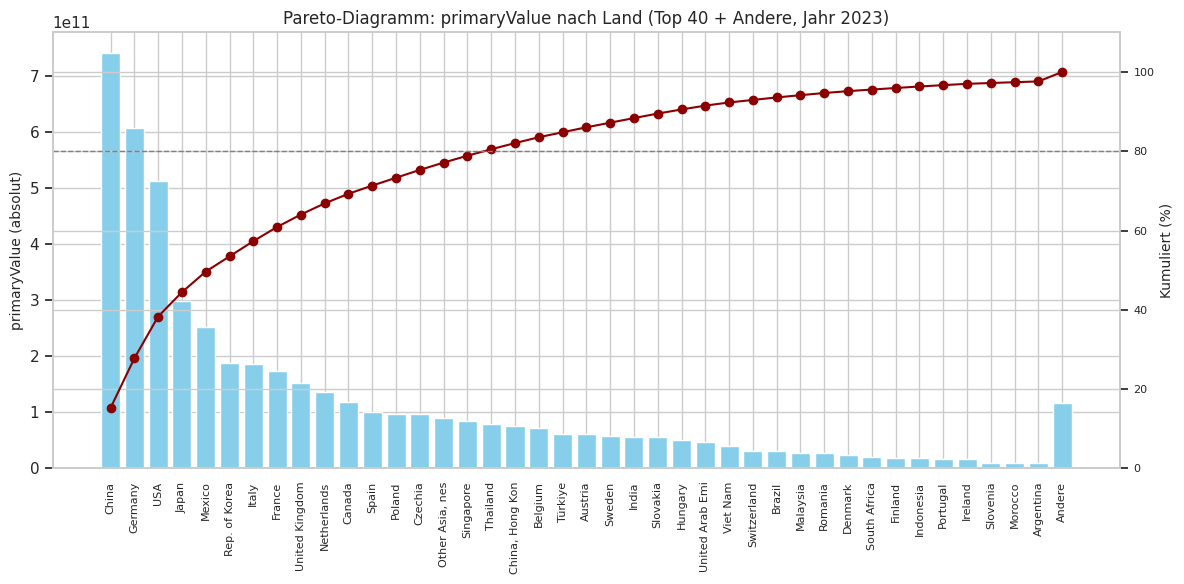

In [84]:
# --- 1. Daten vorbereiten ---

# Filter auf Jahr 2023 und relevante Spalten
df_2023 = df[df['refYear'] == 2023].copy()
df_pop = df_2023[['reporterDesc', 'primaryValue']].dropna()

# Gruppieren nach Land (falls mehrfach vorhanden) und summieren
df_pop = df_pop.groupby('reporterDesc', as_index=False)['primaryValue'].sum()

# Sortieren nach PrimaryValue
df_pop_sorted = df_pop.sort_values(by='primaryValue', ascending=False).reset_index(drop=True)

# --- 2. Top 40 + "Andere" zusammenfassen ---
top_n = 40
df_top = df_pop_sorted.head(top_n).copy()

# Restliche Länder aggregieren
rest = df_pop_sorted.tail(len(df_pop_sorted) - top_n)
other_sum = rest['primaryValue'].sum()

# "Andere"-Zeile hinzufügen
df_top = pd.concat([
    df_top,
    pd.DataFrame([{'reporterDesc': 'Andere', 'primaryValue': other_sum}])
], ignore_index=True)

# Kumulierte Prozentwerte berechnen
df_top['cum_percent'] = df_top['primaryValue'].cumsum() / df_top['primaryValue'].sum() * 100

# Optional: Ländernamen kürzen, falls zu lang
df_top['reporterDesc'] = df_top['reporterDesc'].str.slice(0, 15)

# --- 3. Plot erstellen ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Balken für absolute Werte
ax1.bar(df_top['reporterDesc'], df_top['primaryValue'], color='skyblue')
ax1.set_ylabel('primaryValue (absolut)', fontsize=10)
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Zweite Y-Achse für kumulierte Prozentwerte
ax2 = ax1.twinx()
ax2.plot(df_top['reporterDesc'], df_top['cum_percent'], color='darkred', marker='o')
ax2.set_ylabel('Kumuliert (%)', fontsize=10)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_ylim(0, 110)

# Hilfslinie bei 80 %
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)

# Titel und Layout
plt.title('Pareto-Diagramm: primaryValue nach Land (Top 40 + Andere, Jahr 2023)', fontsize=12)
plt.tight_layout()
plt.show()
